<a href="https://colab.research.google.com/github/drypuddle1220/Sports_Betting_Analytics/blob/main/NBA_Predictions_RF(Approach_2%2C_DataClean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 3.8 MB/s eta 0:00:00


In [2]:

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team IN
abb_bank = []
for k in range(len(nba_teams)):
  abb_bank.append( [team for team in nba_teams][k]['id'])
abb_bank

import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder

# Query for games where the Celtics were playing
game_list = []


for team_id in abb_bank:
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id)
    # Append the retrieved DataFrame to the list
    game_list.append(gamefinder.get_data_frames()[0])

# Concatenate all DataFrames into a single DataFrame
games = pd.concat(game_list, ignore_index=True)

# Convert 'GAME_DATE' to datetime objects
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])
# Filter games to include only those after 2018
games_post_2022 = games[(games['GAME_DATE'].dt.year > 2017) & (games['GAME_DATE'].dt.year < 2020)]
games_post_2022['Total_Pts'] = games_post_2022['PTS'] + (games_post_2022['PTS'] + games_post_2022['PLUS_MINUS'])


<ipython-input-2-c54975669fe9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_post_2022['Total_Pts'] = games_post_2022['PTS'] + (games_post_2022['PTS'] + games_post_2022['PLUS_MINUS'])


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willyiamyu/nba-2k-ratings-with-real-nba-stats")

print("Path to dataset files:", path)

100%|██████████| 127k/127k [00:00<00:00, 460kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/willyiamyu/nba-2k-ratings-with-real-nba-stats/versions/1


In [4]:
import os
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]  # Assumes CSV format
full_path = os.path.join(path, csv_file)

# Load it into a DataFrame
df = pd.read_csv(full_path)
Orlando = df[(df['TEAM'] == 'ORL') & (df['SEASON'] == '2019-20')]
Orlando

,Unnamed: 0,PLAYER,TEAM,AGE,SEASON,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,0,Aaron Gordon,ORL,24,2019-20,62,30,32,32.5,14.4,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
6,6,Al-Farouq Aminu,ORL,29,2019-20,18,7,11,21.1,4.3,...,1.2,0.9,1.0,0.4,1.5,15.3,1.0,0.0,-1.9,75.0
15,15,Amile Jefferson,ORL,27,2019-20,18,5,13,4.1,0.8,...,0.2,0.2,0.1,0.2,0.4,3.2,0.0,0.0,1.0,69.0
30,30,BJ Johnson,ORL,24,2019-20,10,5,5,8.3,3.0,...,0.3,0.6,0.3,0.0,0.3,5.6,0.0,0.0,-0.9,68.0
156,191,Evan Fournier,ORL,27,2019-20,66,28,38,31.4,18.5,...,3.2,1.9,1.1,0.2,2.4,28.4,0.0,0.0,-1.2,80.0
167,202,Gary Clark,ORL,25,2019-20,42,23,19,13.5,3.7,...,0.4,0.2,0.1,0.5,1.1,9.2,0.0,0.0,-1.3,72.0
211,258,James Ennis III,ORL,29,2019-20,69,42,27,18.3,6.6,...,0.9,0.8,0.5,0.3,2.0,13.8,1.0,0.0,0.0,75.0
250,305,Jonathan Isaac,ORL,22,2019-20,34,15,19,28.8,11.9,...,1.4,1.4,1.6,2.3,2.4,32.3,5.0,0.0,0.5,82.0
260,315,Josh Magette,ORL,30,2019-20,8,3,5,4.7,1.5,...,0.6,0.6,0.4,0.1,0.5,4.2,0.0,0.0,0.1,68.0
296,366,Khem Birch,ORL,27,2019-20,48,19,29,19.2,4.4,...,1.0,0.6,0.4,0.5,1.9,13.5,0.0,0.0,-2.7,72.0


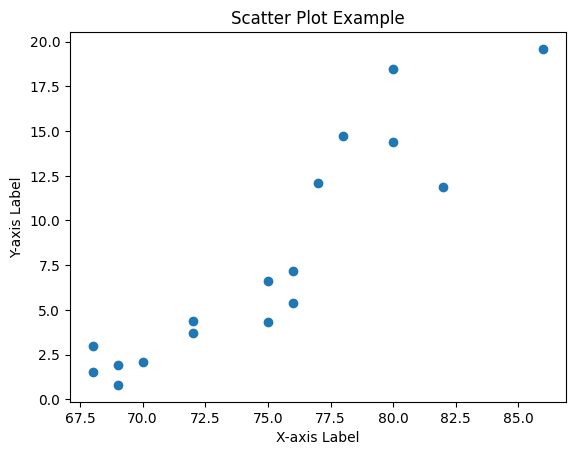

In [5]:
import matplotlib.pyplot as plt
plt.scatter(Orlando['rankings'], Orlando['PTS'])

# Add labels and title
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatter Plot Example")

plt.show()

In [6]:
df['potential'] = (df['rankings'] ** 1.5)/2
grouped = df.groupby(['TEAM', 'SEASON']).sum()

Unnamed: 0                                             PLAYER  \
TEAM SEASON                                                                   
ATL  2014-15        4215  Al HorfordDeMarre CarrollDennis SchroderJeff T...   
     2015-16        4510  Al HorfordDennis SchroderJeff TeagueKent Bazem...   
     2016-17        5274  DeAndre' BembryDennis SchroderDwight HowardErs...   
     2017-18        5402  Antonius ClevelandDamion LeeDeAndre' BembryDen...   
     2018-19        4120  Alex LenDeAndre' BembryDewayne DedmonDeyonta D...   
...                  ...                                                ...   
WAS  2015-16        3543  Alan AndersonBradley BealGarrett TempleJared D...   
     2016-17        4223  Bojan BogdanovicBradley BealBrandon JenningsCh...   
     2017-18        5904  Bradley BealDevin RobinsonIan MahinmiJason Smi...   
     2018-19        4384  Bobby PortisBradley BealIan MahinmiJabari Park...   
     2019-20        5486  Admiral SchofieldAnzejs PasecniksBradley BealC...   

              AGE   GP    W    L    MIN    PTS   FGM    FGA  ...   TOV   STL  \
TEAM SEASON                                                  ...               
ATL  2014-15  323  758  556  202  269.9  116.7  43.7   92.6  ...  14.8  10.4   
     2015-16  341  827  481  346  268.2  114.2  42.9   93.2  ...  15.7   9.7   
     2016-17  394  873  441  432  298.6  125.8  46.4  104.4  ...  18.6   9.8   
     2017-18  319  617  183  434  273.0  112.7  42.9   95.9  ...  17.2   9.0   
     2018-19  267  635  223  412  250.0  118.0  43.9   93.5  ...  16.8   8.5   
...           ...  ...  ...  ...    ...    ...   ...    ...  ...   ...   ...   
WAS  2015-16  325  752  363  389  273.1  120.3  45.1  101.7  ...  15.4   9.8   
     2016-17  389  889  490  399  301.4  134.1  50.5  106.6  ...  17.5  10.5   
     2017-18  359  832  438  394  288.5  123.9  46.6  101.8  ...  16.9  10.2   
     2018-19  294  639  228  411  274.2  134.0  50.0  106.8  ...  17.3   9.2   
     2019-20  507  736  269  467  376.9  167.8  60.1  133.1  ...  20.2  11.8   

              BLK    PF     FP    DD2  TD3   +/-  rankings    potential  
TEAM SEASON                                                              
ATL  2014-15  4.8  18.7  246.3   51.0  1.0  29.6     912.0  3982.068530  
     2015-16  6.5  21.8  245.7   58.0  0.0  19.0     921.0  4039.663354  
     2016-17  5.8  23.0  265.2   93.0  0.0  -9.9    1059.0  4611.265335  
     2017-18  5.5  22.5  237.6   39.0  0.0 -38.4     948.0  4054.984662  
     2018-19  5.8  24.0  244.1   90.0  1.0 -32.5     837.0  3655.423021  
...           ...   ...    ...    ...  ...   ...       ...          ...  
WAS  2015-16  4.0  23.0  241.7  100.0  4.0   1.4     900.0  3904.683911  
     2016-17  4.8  26.6  272.4  113.0  0.0  10.0    1128.0  4904.240802  
     2017-18  5.0  26.3  263.6   57.0  0.0  13.5     993.0  4349.568501  
     2018-19  5.3  22.8  270.5   72.0  3.0 -21.6     848.0  3729.218227  
     2019-20  7.0  38.2  335.9   36.0  1.0 -31.5    1486.0  6414.220173  

[180 rows x 31 columns]

In [7]:
grouped = grouped.reset_index()[['TEAM', 'SEASON', 'potential']].copy()
grouped['SEASON'] = grouped['SEASON'].str.split('-').str[0]
grouped

,TEAM,SEASON,potential
0,ATL,2014,3982.068530
1,ATL,2015,4039.663354
2,ATL,2016,4611.265335
3,ATL,2017,4054.984662
4,ATL,2018,3655.423021
...,...,...,...
175,WAS,2015,3904.683911
176,WAS,2016,4904.240802
177,WAS,2017,4349.568501
178,WAS,2018,3729.218227


In [40]:
games_post_2022
game_id = []
year = {}
for game in games_post_2022['GAME_ID']:
  game_id.append(game)
  year[game] = str(games_post_2022[games_post_2022['GAME_ID'] == game]['GAME_DATE'].dt.year.values[0])
print(year)

{'0021900491': '2019', '0021900477': '2019', '0021900469': '2019', '0021900444': '2019', '0021900431': '2019', '0021900416': '2019', '0021900403': '2019', '0021900390': '2019', '0021900373': '2019', '0021900361': '2019', '0021900354': '2019', '0021900336': '2019', '0021900309': '2019', '0021900295': '2019', '0021900282': '2019', '0021900272': '2019', '0021900261': '2019', '0021900243': '2019', '0021900228': '2019', '0021900215': '2019', '0021900204': '2019', '0021900188': '2019', '0021900182': '2019', '0021900165': '2019', '0021900150': '2019', '0021900138': '2019', '0021900119': '2019', '0021900105': '2019', '0021900099': '2019', '0021900066': '2019', '0021900052': '2019', '0021900043': '2019', '0021900028': '2019', '0021900014': '2019', '0011900070': '2019', '0011900063': '2019', '0011900053': '2019', '0011900026': '2019', '0011900015': '2019', '1521900072': '2019', '1521900060': '2019', '1521900042': '2019', '1521900023': '2019', '1521900013': '2019', '0021801220': '2019', '00218012

In [42]:
from nba_api.stats.endpoints import boxscoreadvancedv2

df['YEAR'] = df['SEASON'].str.split('-').str[0].astype(str)

for game in game_id[:5]:
  arena = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game)
  arena = arena.get_data_frames()[0]
  arena = arena.loc[arena['COMMENT'].str[:3] == 'DNP']
  arena = arena[['PLAYER_NAME']]
  arena['YEAR'] = year[game]
  arena_merge = arena.merge(df, left_on=['PLAYER_NAME', 'YEAR'], right_on=['PLAYER', 'YEAR'], how='left')
  print(arena_merge)

#took all the players by year, now all I have to do is add up the elo rankings and append it/minus it to the potential column


         PLAYER_NAME  YEAR  Unnamed: 0        PLAYER TEAM   AGE   SEASON  \
0  Charlie Brown Jr.  2019         NaN           NaN  NaN   NaN      NaN   
1        Evan Turner  2019       192.0   Evan Turner  MIN  31.0  2019-20   
2         Khem Birch  2019       366.0    Khem Birch  ORL  27.0  2019-20   
3       Josh Magette  2019       315.0  Josh Magette  ORL  30.0  2019-20   

     GP     W     L  ...  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  rankings  \
0   NaN   NaN   NaN  ...  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN       NaN   
1  19.0   3.0  16.0  ...  1.4  0.5  0.4  1.1  10.0  0.0  0.0 -3.4      73.0   
2  48.0  19.0  29.0  ...  0.6  0.4  0.5  1.9  13.5  0.0  0.0 -2.7      72.0   
3   8.0   3.0   5.0  ...  0.6  0.4  0.1  0.5   4.2  0.0  0.0  0.1      68.0   

    potential  
0         NaN  
1  311.856137  
2  305.470129  
3  280.371183  

[4 rows x 35 columns]
        PLAYER_NAME  YEAR  Unnamed: 0            PLAYER TEAM  AGE   SEASON  \
0  Chandler Parsons  2019          67  Cha